<a href="https://colab.research.google.com/github/MicheleSimo/Collection_for_my_progress/blob/main/EDA_ML_CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
df = pd.read_csv("Churn_Modelling.csv")
print(df.head(5))

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       2        0              1          1               1           101349   
1       1    83808              1          0               1           112543   
2       8   159661              3          1               0           113932   
3       1        0              2          0               0            93827   
4       2   125511              1        NaN               1            79084   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       

In [126]:
print(df.isnull().sum())
df = df.fillna(0)
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


       RowNumber  CustomerId  CreditScore   Age  Tenure  Balance  \
count      10002       10002        10002 10002   10002    10002   
mean        5001    15690933          651    39       5    76491   
std         2887       71932           97    10       3    62393   
min            1    15565701          350     0       0        0   
25%         2501    15628525          584    32       3        0   
50%         5002    15690732          652    37       5    97199   
75%         7502    15753226          718    44       7   127648   
max        10000    15815690          850    92      10   250898   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
count          10002      10002           10002            10002   10002  
mean               2          1               1           100083       0  
std                1          0               0            57508       0  
min                1          0               0               12       0  
25%         

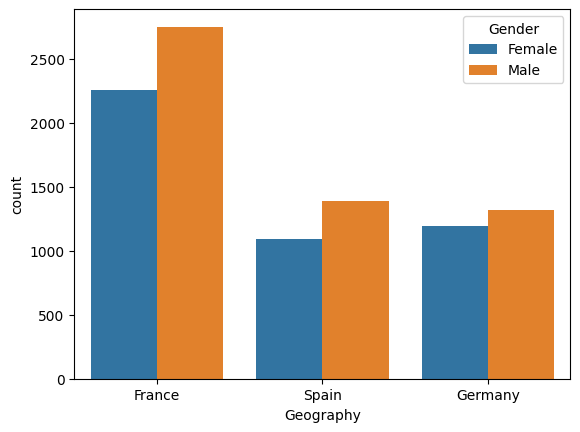

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df.describe())
print(df["Geography"].value_counts())
df["Geography"] = df["Geography"].replace(0,"France")
print(df["Geography"].value_counts())

g1 = sns.countplot(x="Geography", data=df, hue="Gender")
plt.show()

In [128]:
import pandas as pd
# Imposta l'opzione di visualizzazione per evitare la notazione scientifica per i numeri interi
pd.options.display.float_format = '{:.0f}'.format

print(df.head())
print(df.columns)

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       2        0              1          1               1           101349   
1       1    83808              1          0               1           112543   
2       8   159661              3          1               0           113932   
3       1        0              2          0               0            93827   
4       2   125511              1          0               1            79084   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       

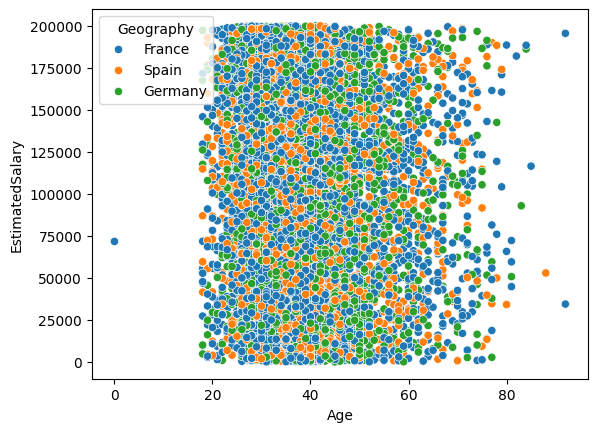

In [129]:
g2 = sns.scatterplot(df,x="Age",y="EstimatedSalary",hue="Geography")
plt.show()


[101348.88 112542.58 113931.57 ...  42085.58  92888.52  38190.78]
[101348.88 112542.58 113931.57 ...  96270.64 101699.77  92888.52]


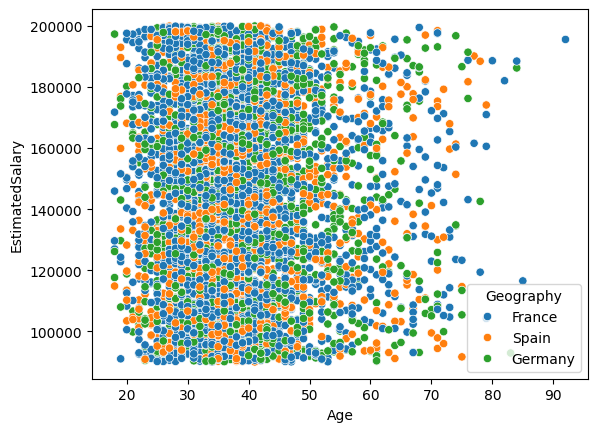

In [130]:
print(df["EstimatedSalary"].unique())
df2 = df[df["EstimatedSalary"] > 90000]
print(df2["EstimatedSalary"].unique())
g2_2 = sns.scatterplot(df2,x="Age",y="EstimatedSalary",hue="Geography")
plt.show()

Surname
Smith        32
Martin       29
Walker       29
Scott        29
Brown        26
             ..
Hull          1
Sturdee       1
Flannagan     1
Dwyer         1
Corby         1
Name: count, Length: 2932, dtype: int64
<class 'pandas.core.series.Series'>
<class 'dict'>
['Smith', 'Martin', 'Walker', 'Scott', 'Brown']


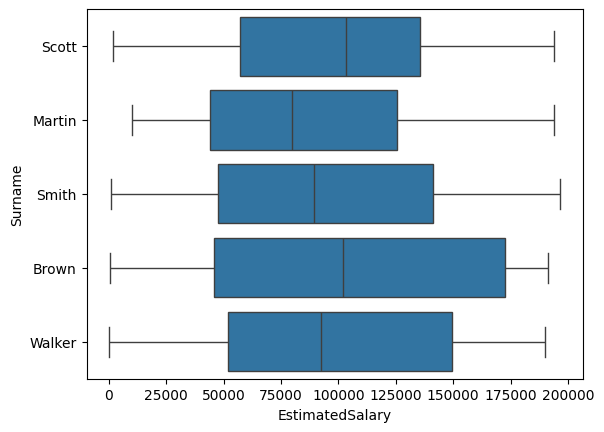

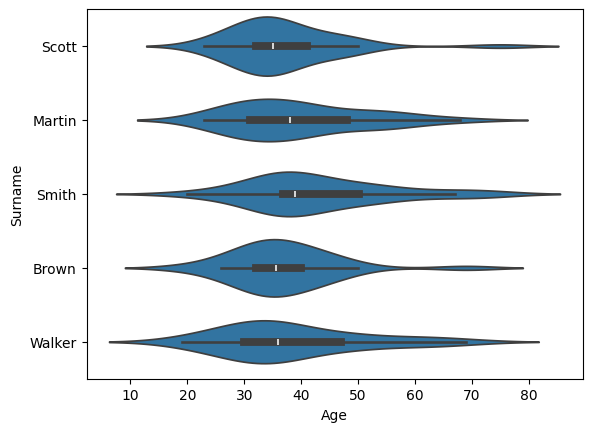

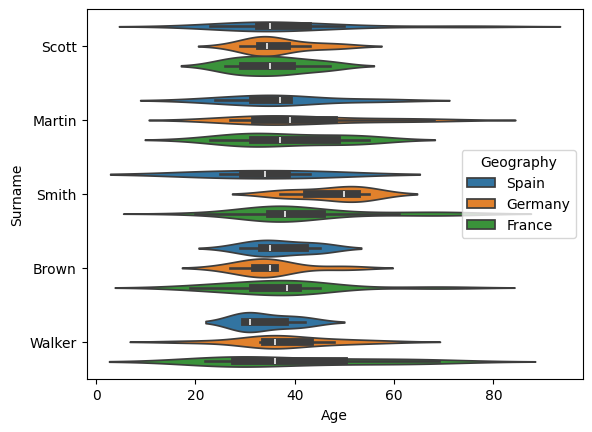

In [131]:
print(df["Surname"].value_counts())
print(type(df["Surname"].value_counts()))
dict_counts = dict(df["Surname"].value_counts())
print(type(dict_counts))
MostFrequentSurnames = [x for x in dict_counts.keys() if dict_counts[x] > 25]
print(MostFrequentSurnames)
df3 = df[df["Surname"].isin(MostFrequentSurnames)]
g3 = sns.boxplot(df3,y="Surname",x="EstimatedSalary")
plt.show()
g4 = sns.violinplot(df3,y="Surname",x="Age")
plt.show()
g4_2 = sns.violinplot(df3,y="Surname",x="Age",hue="Geography")
plt.show()

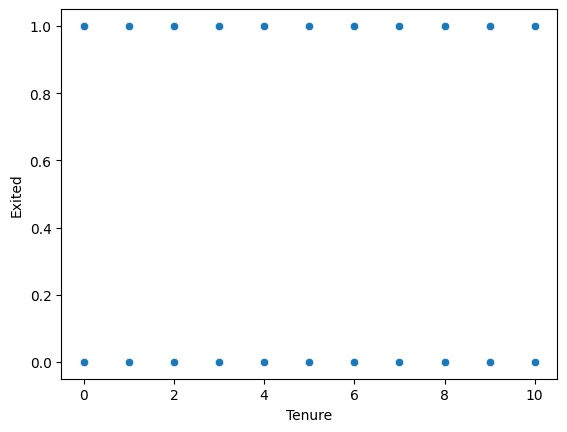

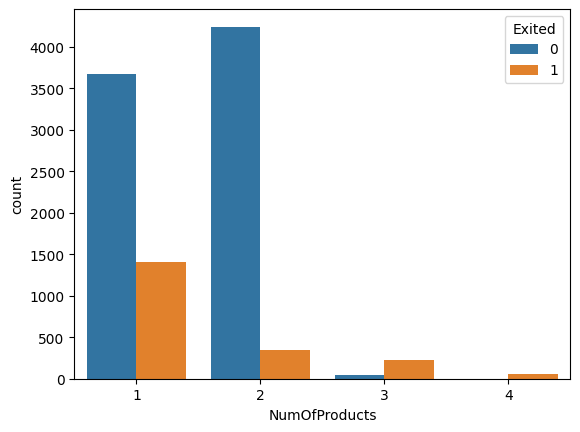

In [132]:
g5 = sns.scatterplot(df,x="Tenure",y="Exited")
plt.show()
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.show()

[1. 0.]
['Yes' 'No']


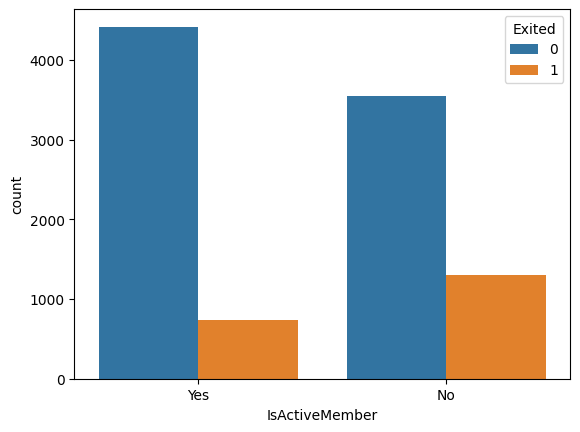

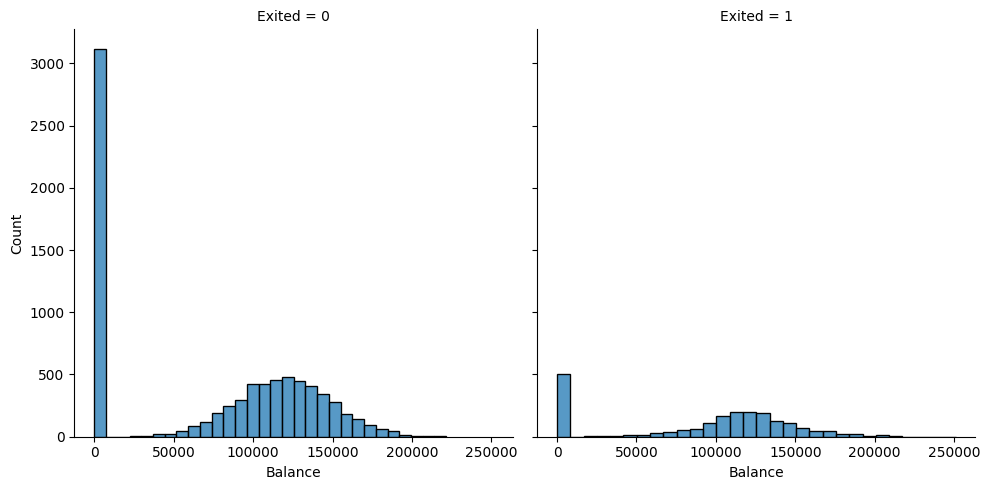

In [133]:
print(df["IsActiveMember"].unique())
df["IsActiveMember"] = df["IsActiveMember"].replace({0 : "No",1 : "Yes"})
print(df["IsActiveMember"].unique())
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.show()
g7 = sns.FacetGrid(df, col='Exited', height=5)
g7.map(sns.histplot, 'Balance', bins=30)
plt.show()

**Machine learning Phase**

In [134]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder_gender = LabelEncoder()
label_encoder_isActiveMember = LabelEncoder()
label_encoder_Geo = LabelEncoder()

# Apply LabelEncoder to 'Gender' and 'IsActiveMember' columns
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
df['Geography'] = label_encoder_Geo.fit_transform(df['Geography'])
df['IsActiveMember'] = label_encoder_isActiveMember.fit_transform(df['IsActiveMember'])

# Display the first few rows of the updated dataframe
display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0,1,1,1,101349,1
1,2,15647311,Hill,608,2,0,41,1,83808,1,0,1,112543,0
2,3,15619304,Onio,502,0,0,42,8,159661,3,1,0,113932,1
3,4,15701354,Boni,699,0,0,39,1,0,2,0,0,93827,0
4,5,15737888,Mitchell,850,2,0,43,2,125511,1,0,1,79084,0


In [135]:
# Select numerical columns excluding the target variable 'Exited'
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Exited')
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[numerical_cols] = ss.fit_transform(df[numerical_cols])
print("Colonne numeriche scalate (esclusa 'Exited'):")
print(numerical_cols)

Colonne numeriche scalate (esclusa 'Exited'):
Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'],
      dtype='object')


In [136]:
from sklearn.model_selection import train_test_split
X = df.drop(["Exited", "Surname"], axis=1)
y = df["Exited"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

Inizio addestramento del modello XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:53:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Addestramento completato.

--- Valutazione del Modello ---
Accuratezza: 0.8311

Report di Classificazione:
               precision    recall  f1-score   support

    Resta (0)       0.90      0.89      0.90      2436
Abbandona (1)       0.55      0.59      0.57       565

     accuracy                           0.83      3001
    macro avg       0.73      0.74      0.73      3001
 weighted avg       0.84      0.83      0.83      3001


Matrice di Confusione:
[[2163  273]
 [ 234  331]]


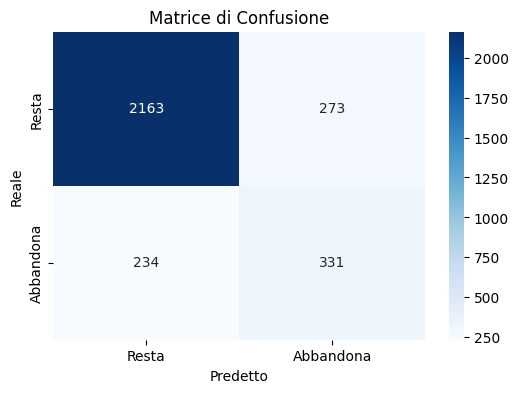


--- Importanza delle Caratteristiche ---
            feature  importance
8     NumOfProducts           0
10   IsActiveMember           0
5               Age           0
3         Geography           0
7           Balance           0
4            Gender           0
9         HasCrCard           0
11  EstimatedSalary           0
0         RowNumber           0
1        CustomerId           0


/tmp/ipython-input-1395355968.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances.head(10), palette='viridis')


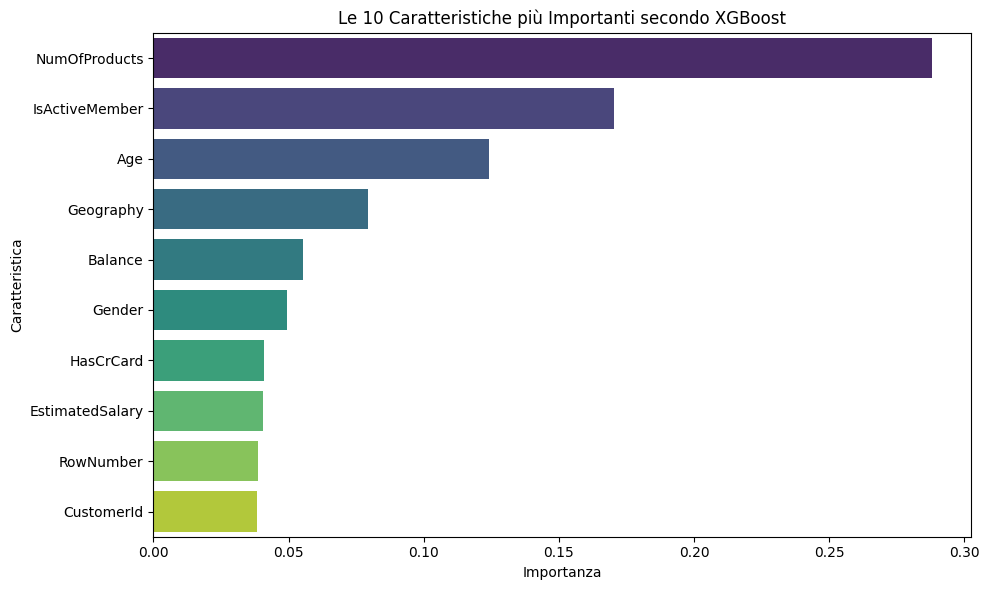

In [137]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crea l'istanza del modello. Iniziamo con i parametri di default.
# Un parametro utile per dati sbilanciati è 'scale_pos_weight'
# Calcoliamo un valore per questo: conta quante volte la classe 0 è più frequente della classe 1
# Assicurati che y_train contenga ancora i valori originali 0 e 1
scale_pos_weight_value = y_train.value_counts()[0] / y_train.value_counts()[1]

model = xgb.XGBClassifier(
    objective='binary:logistic',  # Obiettivo: classificazione binaria
    eval_metric='logloss',        # Metrica per la valutazione interna
    use_label_encoder=False,      # Impostazione consigliata per le nuove versioni
    scale_pos_weight=scale_pos_weight_value, # Gestisce lo sbilanciamento delle classi!
    random_state=42
)

print("Inizio addestramento del modello XGBoost...")
model.fit(X_train, y_train)
print("Addestramento completato.")

# Fai le predizioni sul set di test
y_pred = model.predict(X_test)

# Valuta i risultati
print("\n--- Valutazione del Modello ---")

# Accuratezza
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuratezza: {accuracy:.4f}")

# Report di Classificazione (con Precision, Recall, F1-score)
print("\nReport di Classificazione:")
print(classification_report(y_test, y_pred, target_names=['Resta (0)', 'Abbandona (1)']))

# Matrice di Confusione
print("\nMatrice di Confusione:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualizzazione della Matrice di Confusione
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Resta', 'Abbandona'], yticklabels=['Resta', 'Abbandona'])
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.title('Matrice di Confusione')
plt.show()

# Estrai l'importanza delle caratteristiche dal modello addestrato
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n--- Importanza delle Caratteristiche ---")
print(feature_importances.head(10)) # Mostra le 10 più importanti

# Crea un grafico a barre per visualizzare le feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10), palette='viridis')
plt.title('Le 10 Caratteristiche più Importanti secondo XGBoost')
plt.xlabel('Importanza')
plt.ylabel('Caratteristica')
plt.tight_layout()
plt.show()